<a href="https://colab.research.google.com/github/krish-117/Projects/blob/test/Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Data/insurance.csv')

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [24]:
print(df.isnull().sum())
print(df.duplicated().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
1


In [25]:
df.drop_duplicates(inplace=True)

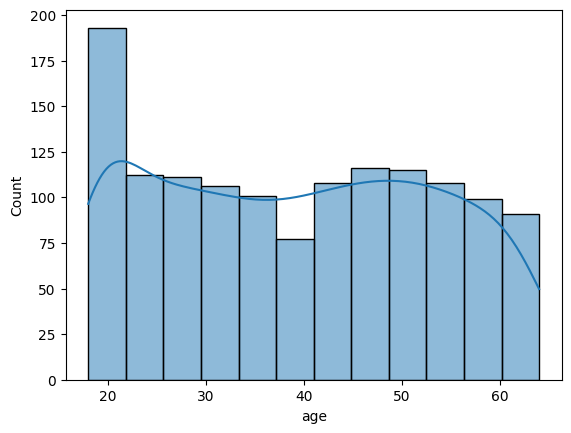

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['age'], kde=True)
plt.show()

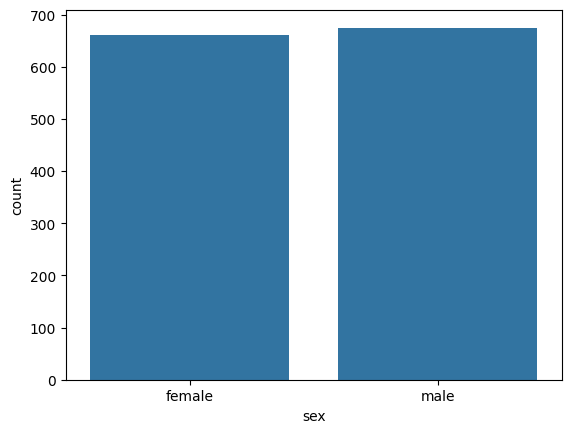

In [28]:
sns.countplot(x='sex', data=df)
plt.show()

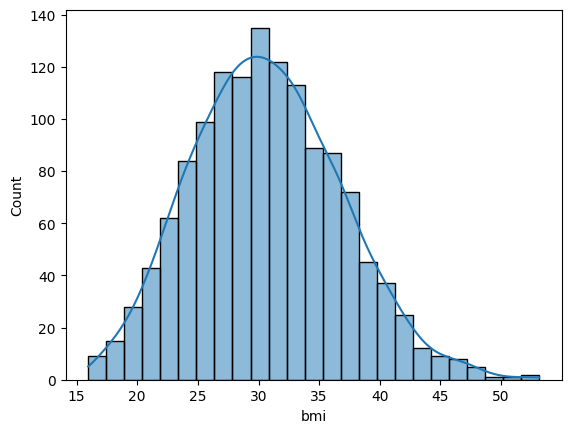

In [29]:
sns.histplot(df['bmi'], kde=True)
plt.show()

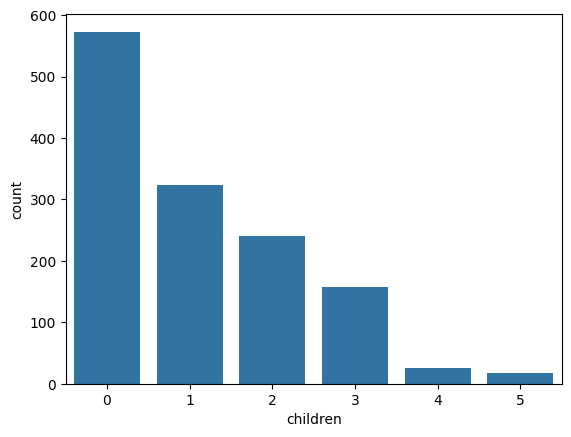

In [30]:
sns.countplot(x='children', data=df)
plt.show()

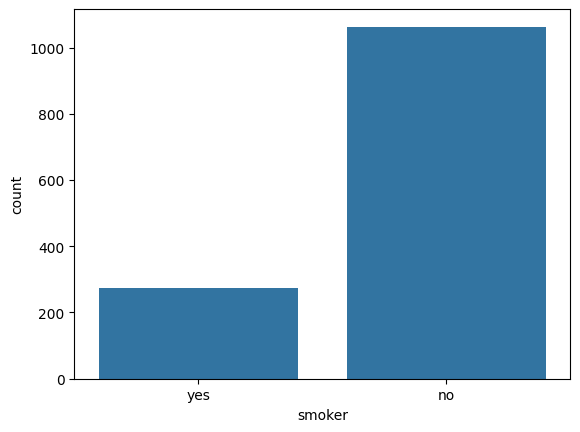

In [31]:
sns.countplot(x='smoker', data=df)
plt.show()

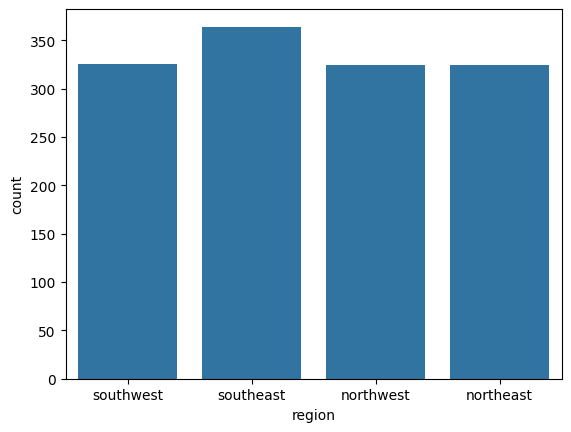

In [32]:
sns.countplot(x='region', data=df)
plt.show()

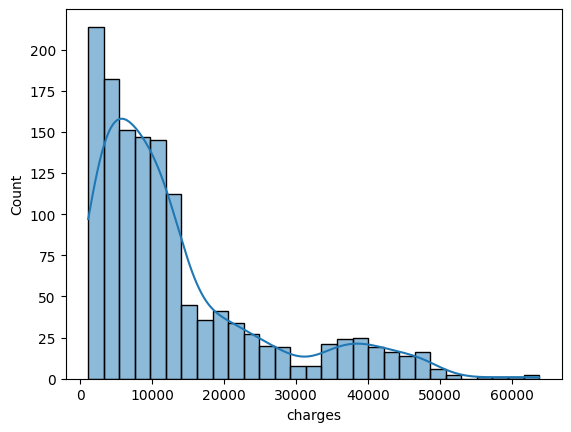

In [33]:
sns.histplot(df['charges'], kde=True)
plt.show()

In [34]:
df['sex'] = df['sex'].map({'female':0,'male':1})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})

In [35]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [36]:
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [38]:
df.corr()['charges']

,charges
age,0.298308
sex,0.058044
bmi,0.198401
children,0.067389
smoker,0.787234
region,0.006547
charges,1.000000


In [39]:
df['age*2'] = df['age']**2
df['bmi*2'] = df['bmi']**2

In [40]:
df['age*childeren'] = df['age']*df['children']
df['bmi*childeren'] = df['bmi']*df['children']

In [41]:
df['sex*smoker'] = df['sex']*df['smoker']

In [42]:
df.corr()['charges']

,charges
age,0.298308
sex,0.058044
bmi,0.198401
children,0.067389
smoker,0.787234
region,0.006547
charges,1.000000
age*2,0.300166
bmi*2,0.192971
age*childeren,0.131436


In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('charges', axis=1),  # Features (independent variables)
    df['charges'],  # Target variable (dependent variable)
    test_size=0.2,  # Proportion of data to be used for testing (20% in this case)
    random_state=42,  # For reproducibility (you can set any number)
    shuffle=True,  # Shuffle the data before splitting (default is True)
)


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()

# Train the model
model.fit(X_train, y_train)



LinearRegression()

In [46]:

from sklearn.model_selection import cross_val_score

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(cross_val_score(model, df.drop('charges', axis=1), df['charges'], cv=5).mean())


0.7395691188700221
0.7960877194971926
0.7494920943492901


In [48]:
input_data = [62,1,	32.015,0,1,3]

test = pd.DataFrame([input_data], columns=['age', 'sex', 'bmi', 'children', 'smoker', 'region'])

test['age*2'] = test['age']**2
test['bmi*2'] = test['bmi']**2

test['age*childeren'] = test['age']*test['children']
test['bmi*childeren'] = test['bmi']*test['children']

test['sex*smoker'] = test['sex']*test['smoker']

test = scaler.transform(test)

model.predict(test)

array([39722.99501681])